In [1]:
import requests
# requests is to get the html source code of any website
from bs4 import BeautifulSoup
# the main package bs4, from which we get the function BeautifulSoup()
import pandas as pd
import numpy as np

In [2]:
url='https://www.expedia.co.uk/Things-To-Do-In-Portsmouth.d553248634335196573.Travel-Guide-Activities'

In [3]:
attractions_html=requests.get(url).text

<!DOCTYPE html><html data-language="en_GB" dir="ltr" lang="en"><head><title>10 TOP Things to Do in Portsmouth March 2023 | Expedia</title><meta name="robots" content="index,follow"/><meta name="description" content="Find things to see and do in Portsmouth - Discover top tourist attractions, sightseeing tours and activities, and book them on Expedia."/><link rel="canonical" href="https://www.expedia.co.uk/Things-To-Do-In-Portsmouth.d553248634335196573.Travel-Guide-Activities"/><meta http-equiv="Content-language" content="en_GB"/><meta name="keywords" content="Things to do Portsmouth, Activities in Portsmouth"/><meta name="flex:page-type" content="Travel-Guide-Activities"/><meta name="flex:template-id" content="3-en_GB-Travel-Guide-Activities-Generic-Blossom"/><meta name="flex:template-fm-id" content="17628"/><meta name="flex:template-version" content="371"/><meta name="ESSClientID" content="flex.activity.Travel-Guide-Activities"/><meta name="ewe:page" content="FLEX"/><link rel="alternat
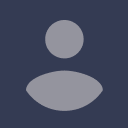
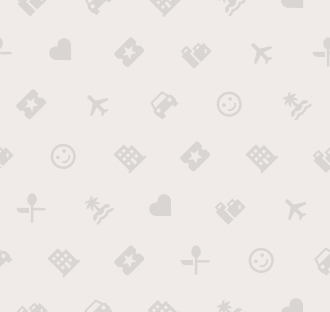

In [4]:
print(attractions_html)

In [5]:
soup = BeautifulSoup(attractions_html, 'lxml')
# we convert the above string into a bs4, lxml object so that the function understands the page

<!DOCTYPE html>
<html data-language="en_GB" dir="ltr" lang="en"><head><title>10 TOP Things to Do in Portsmouth March 2023 | Expedia</title><meta content="index,follow" name="robots"/><meta content="Find things to see and do in Portsmouth - Discover top tourist attractions, sightseeing tours and activities, and book them on Expedia." name="description"/><link href="https://www.expedia.co.uk/Things-To-Do-In-Portsmouth.d553248634335196573.Travel-Guide-Activities" rel="canonical"/><meta content="en_GB" http-equiv="Content-language"/><meta content="Things to do Portsmouth, Activities in Portsmouth" name="keywords"/><meta content="Travel-Guide-Activities" name="flex:page-type"/><meta content="3-en_GB-Travel-Guide-Activities-Generic-Blossom" name="flex:template-id"/><meta content="17628" name="flex:template-fm-id"/><meta content="371" name="flex:template-version"/><meta content="flex.activity.Travel-Guide-Activities" name="ESSClientID"/><meta content="FLEX" name="ewe:page"/><link href="https:
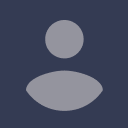
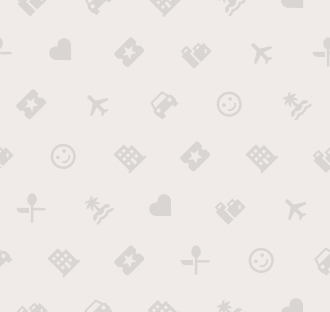

In [6]:
soup

In [7]:
print(dir(soup))

['ASCII_SPACES', 'DEFAULT_BUILDER_FEATURES', 'DEFAULT_INTERESTING_STRING_TYPES', 'NO_PARSER_SPECIFIED_WARNING', 'ROOT_TAG_NAME', '__bool__', '__call__', '__class__', '__contains__', '__copy__', '__delattr__', '__delitem__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattr__', '__getattribute__', '__getitem__', '__getstate__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__iter__', '__le__', '__len__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__setitem__', '__sizeof__', '__str__', '__subclasshook__', '__unicode__', '__weakref__', '_all_strings', '_decode_markup', '_feed', '_find_all', '_find_one', '_is_xml', '_lastRecursiveChild', '_last_descendant', '_linkage_fixer', '_markup_is_url', '_markup_resembles_filename', '_most_recent_element', '_namespaces', '_popToTag', '_should_pretty_print', 'append', 'attrs', 'builder', 'can_be_empty_element', 'cdata_list_attributes', 'childGenerator',

In [8]:
names = soup.findAll('h3',{'class':"uitk-heading uitk-heading-5"})
len(names)

4

In [9]:
names1 = soup.findAll('span',{'class':"is-visually-hidden"})
len(names1)

22

In [10]:
names1

[<span class="is-visually-hidden">Explore map</span>,
 <span class="is-visually-hidden">Gunwharf Quays</span>,
 <span class="is-visually-hidden">Portsmouth Historic Dockyard</span>,
 <span class="is-visually-hidden">Portsmouth International Port</span>,
 <span class="is-visually-hidden">HMS Victory</span>,
 <span class="is-visually-hidden">Portsmouth Guildhall</span>,
 <span class="is-visually-hidden">Mary Rose Museum</span>,
 <span class="is-visually-hidden">Sally Port</span>,
 <span class="is-visually-hidden">Square Tower</span>,
 <span class="is-visually-hidden">The Point</span>,
 <span class="is-visually-hidden">Portsmouth City Centre</span>,
 <span class="is-visually-hidden">Cosham</span>,
 <span class="is-visually-hidden">Old Portsmouth</span>,
 <span class="is-visually-hidden">Buckland</span>,
 <span class="is-visually-hidden"></span>,
 <span class="is-visually-hidden"></span>,
 <span class="is-visually-hidden"></span>,
 <span class="is-visually-hidden"></span>,
 <span class="is

In [11]:
attraction_names = []
for name in names1:
    attraction_names.append(name.text)
attraction_names = pd.Series(attraction_names, name = "Tourist_Attraction")

In [12]:
attraction_names=attraction_names[1:14:]

In [13]:
attraction_names

1                    Gunwharf Quays
2      Portsmouth Historic Dockyard
3     Portsmouth International Port
4                       HMS Victory
5              Portsmouth Guildhall
6                  Mary Rose Museum
7                        Sally Port
8                      Square Tower
9                         The Point
10           Portsmouth City Centre
11                           Cosham
12                   Old Portsmouth
13                         Buckland
Name: Tourist_Attraction, dtype: object

In [14]:
placestogo= attraction_names.to_frame()
placestogo

,Tourist_Attraction
1,Gunwharf Quays
2,Portsmouth Historic Dockyard
3,Portsmouth International Port
4,HMS Victory
5,Portsmouth Guildhall
6,Mary Rose Museum
7,Sally Port
8,Square Tower
9,The Point
10,Portsmouth City Centre


In [15]:
#Importing first list
placestogo1=pd.read_excel('PortsmouthPlaces.xlsx')

In [16]:
placestogo1=placestogo1.drop(columns=['Unnamed: 0','address_','coordinates'])

In [17]:
placestogo1

,place
0,Hms victory
1,Mary rose museum
2,Hms warrior
3,Portsmouth historic dockyard
4,Spinnaker tower
5,The d-day story
6,Gunwharf quays
7,Royal navy submarine museum
8,Round and square towers in old portsmouth
9,Portsmouth cathedral


In [18]:
touristattr=pd.concat([placestogo1['place'],placestogo['Tourist_Attraction']],ignore_index=True)

In [19]:
touristattr

0                                   Hms victory
1                              Mary rose museum
2                                   Hms warrior
3                  Portsmouth historic dockyard
4                               Spinnaker tower
5                               The d-day story
6                                Gunwharf quays
7                   Royal navy submarine museum
8     Round and square towers in old portsmouth
9                          Portsmouth cathedral
10           Charles dickens' birthplace museum
11            Portsmouth museum and art gallery
12        Southsea beach and pier in portsmouth
13                        Southsea rock gardens
14                                Stansted park
15                Portsmouth international port
16                         Portsmouth guildhall
17                                   Sally port
18                                 Square tower
19                                    The point
20                       Portsmouth city

In [20]:
touristattr=touristattr.to_frame()

In [21]:
touristattr=touristattr.rename(columns={0:'place'})

In [22]:
#changing all to capitalize case
touristattr['place'] =touristattr['place'].str.capitalize()

In [23]:
#removing spaces
touristattr['place'] =touristattr['place'].str.lstrip()
touristattr['place'] =touristattr['place'].str.rstrip()

In [24]:
touristattr['place']=touristattr['place'].drop_duplicates()

In [25]:
touristattr=touristattr.dropna(inplace=False)
touristattr=touristattr.reset_index(drop=True)

In [26]:
touristattr

,place
0,Hms victory
1,Mary rose museum
2,Hms warrior
3,Portsmouth historic dockyard
4,Spinnaker tower
5,The d-day story
6,Gunwharf quays
7,Royal navy submarine museum
8,Round and square towers in old portsmouth
9,Portsmouth cathedral


In [27]:
#touristattr.add_suffix(', Portsmouth,United Kingdom')
#[str(col) + ', Portsmouth,United Kingdom' for col in touristattr.columns]
touristattr['place'] = touristattr['place'].astype(str)+ ', Portsmouth,United Kingdom' 

In [28]:
touristattr

,place
0,"Hms victory, Portsmouth,United Kingdom"
1,"Mary rose museum, Portsmouth,United Kingdom"
2,"Hms warrior, Portsmouth,United Kingdom"
3,"Portsmouth historic dockyard, Portsmouth,Unite..."
4,"Spinnaker tower, Portsmouth,United Kingdom"
5,"The d-day story, Portsmouth,United Kingdom"
6,"Gunwharf quays, Portsmouth,United Kingdom"
7,"Royal navy submarine museum, Portsmouth,United..."
8,"Round and square towers in old portsmouth, Por..."
9,"Portsmouth cathedral, Portsmouth,United Kingdom"


In [29]:
import geopandas as gpd
import geopy
from geopy.geocoders import Nominatim
from geopy.extra.rate_limiter import RateLimiter

In [30]:
#Setting up Nominatim
locator = Nominatim(user_agent="Travelops", timeout=20)
rgeocode = RateLimiter(locator.reverse, min_delay_seconds=0.001)

In [31]:
def location_info(x):

    data = locator.geocode(x) #use this line when using Nominatim
    
    #converted = pd.json_normalize(data).squeeze() #squeeze converts a dataframe to a pandas series
    return data

In [32]:
locator.geocode('D-Day Museum, Portsmouth,United Kingdom')

Location(D-Day Museum, Clarence Esplanade, Old Portsmouth, Portsmouth, England, PO5 3AE, United Kingdom, (50.77964605, -1.0893765716108148, 0.0))

In [33]:
touristattr['place'][5]='D-Day Museum, Portsmouth,United Kingdom'

In [34]:
locator.geocode('Square tower, Portsmouth,United Kingdom')

Location(Square Tower, Millennium Promenade, Old Portsmouth, Portsmouth, England, PO1 2ND, United Kingdom, (50.789355, -1.1065100000000005, 0.0))

In [35]:
touristattr['place'][8]='Square tower, Portsmouth,United Kingdom' 

In [36]:
locator.geocode('Portsmouth museum, Portsmouth,United Kingdom')

Location(Portsmouth City Records Office, Museum Road, Old Portsmouth, Portsmouth, England, PO1 2LE, United Kingdom, (50.79144385, -1.0968967552858682, 0.0))

In [37]:
touristattr['place'][11]='Portsmouth museum, Portsmouth,United Kingdom'

In [38]:
locator.geocode('Southsea beach, Portsmouth,United Kingdom')

Location(Southsea nudist beach, Eastney, Portsmouth, England, PO4 9LP, United Kingdom, (50.7861817, -1.0378028, 0.0))

In [39]:
touristattr['place'][12]='Southsea beach, Portsmouth,United Kingdom'

In [40]:
locator.geocode('Royal navy submarine museum')

Location(Royal Navy Submarine Museum, Haslar Road, Seafield, Clayhall, Gosport, Hampshire, England, PO12 2FG, United Kingdom, (50.78792895, -1.1228231163235636, 0.0))

In [41]:
touristattr['place'][7]='Royal navy submarine museum'

In [42]:
location_info_df = touristattr['place'].apply(location_info)
location_info_df

0     (HMS Victory, Main Road, Portsea, Portsmouth, ...
1     (Mary Rose Museum, Main Road, Portsea, Portsmo...
2     (HMS Warrior, Gosport Ferry Piazza, Portsea, P...
3     (Portsmouth Historic Dockyard, The Hard, Ports...
4     (Spinnaker Tower, The Canalside, Gunwharf Quay...
5     (D-Day Museum, Clarence Esplanade, Old Portsmo...
6     (Gunwharf Quays, Portsea, Portsmouth, England,...
7     (Royal Navy Submarine Museum, Haslar Road, Sea...
8     (Square Tower, Millennium Promenade, Old Ports...
9     (Cathedral Church of St Thomas of Canterbury, ...
10    (Charles Dickens Birthplace Museum, 393, Old C...
11    (Portsmouth City Records Office, Museum Road, ...
12    (Southsea nudist beach, Eastney, Portsmouth, E...
13    (Southsea Rock Gardens, Clarence Esplanade, So...
14                                                 None
15    (Portsmouth International Port, Wharf Road, St...
16    (Portsmouth Guildhall, Guildhall Square, Ports...
17    (Sally Port Inn, 57,58, High Street, Old P

In [43]:
df_locations = pd.concat([touristattr,location_info_df], axis=1)
df_locations.head()

,place,place
0,"Hms victory, Portsmouth,United Kingdom","(HMS Victory, Main Road, Portsea, Portsmouth, ..."
1,"Mary rose museum, Portsmouth,United Kingdom","(Mary Rose Museum, Main Road, Portsea, Portsmo..."
2,"Hms warrior, Portsmouth,United Kingdom","(HMS Warrior, Gosport Ferry Piazza, Portsea, P..."
3,"Portsmouth historic dockyard, Portsmouth,Unite...","(Portsmouth Historic Dockyard, The Hard, Ports..."
4,"Spinnaker tower, Portsmouth,United Kingdom","(Spinnaker Tower, The Canalside, Gunwharf Quay..."


In [44]:
df_locations.columns =['place','address']

In [45]:
df_locations.head()

,place,address
0,"Hms victory, Portsmouth,United Kingdom","(HMS Victory, Main Road, Portsea, Portsmouth, ..."
1,"Mary rose museum, Portsmouth,United Kingdom","(Mary Rose Museum, Main Road, Portsea, Portsmo..."
2,"Hms warrior, Portsmouth,United Kingdom","(HMS Warrior, Gosport Ferry Piazza, Portsea, P..."
3,"Portsmouth historic dockyard, Portsmouth,Unite...","(Portsmouth Historic Dockyard, The Hard, Ports..."
4,"Spinnaker tower, Portsmouth,United Kingdom","(Spinnaker Tower, The Canalside, Gunwharf Quay..."


In [46]:
print(type(df_locations['address'][1][1]))
df_locations['address'][1][1]

<class 'tuple'>


(50.80220235, -1.1089264299156816)

In [47]:
print(type(df_locations['address'][1][0]))
df_locations['address'][1][0]

<class 'str'>


'Mary Rose Museum, Main Road, Portsea, Portsmouth, England, PO1 3LU, United Kingdom'

In [48]:
df_locations=df_locations.reset_index(drop=True)

In [49]:
df_locations

,place,address
0,"Hms victory, Portsmouth,United Kingdom","(HMS Victory, Main Road, Portsea, Portsmouth, ..."
1,"Mary rose museum, Portsmouth,United Kingdom","(Mary Rose Museum, Main Road, Portsea, Portsmo..."
2,"Hms warrior, Portsmouth,United Kingdom","(HMS Warrior, Gosport Ferry Piazza, Portsea, P..."
3,"Portsmouth historic dockyard, Portsmouth,Unite...","(Portsmouth Historic Dockyard, The Hard, Ports..."
4,"Spinnaker tower, Portsmouth,United Kingdom","(Spinnaker Tower, The Canalside, Gunwharf Quay..."
5,"D-Day Museum, Portsmouth,United Kingdom","(D-Day Museum, Clarence Esplanade, Old Portsmo..."
6,"Gunwharf quays, Portsmouth,United Kingdom","(Gunwharf Quays, Portsea, Portsmouth, England,..."
7,Royal navy submarine museum,"(Royal Navy Submarine Museum, Haslar Road, Sea..."
8,"Square tower, Portsmouth,United Kingdom","(Square Tower, Millennium Promenade, Old Ports..."
9,"Portsmouth cathedral, Portsmouth,United Kingdom","(Cathedral Church of St Thomas of Canterbury, ..."


In [50]:
df_locations['address_']=df_locations['address'].astype('str')

In [51]:
df_locations=df_locations.dropna().reset_index(drop=True)

In [52]:
df_locations

,place,address,address_
0,"Hms victory, Portsmouth,United Kingdom","(HMS Victory, Main Road, Portsea, Portsmouth, ...","HMS Victory, Main Road, Portsea, Portsmouth, E..."
1,"Mary rose museum, Portsmouth,United Kingdom","(Mary Rose Museum, Main Road, Portsea, Portsmo...","Mary Rose Museum, Main Road, Portsea, Portsmou..."
2,"Hms warrior, Portsmouth,United Kingdom","(HMS Warrior, Gosport Ferry Piazza, Portsea, P...","HMS Warrior, Gosport Ferry Piazza, Portsea, Po..."
3,"Portsmouth historic dockyard, Portsmouth,Unite...","(Portsmouth Historic Dockyard, The Hard, Ports...","Portsmouth Historic Dockyard, The Hard, Portse..."
4,"Spinnaker tower, Portsmouth,United Kingdom","(Spinnaker Tower, The Canalside, Gunwharf Quay...","Spinnaker Tower, The Canalside, Gunwharf Quays..."
5,"D-Day Museum, Portsmouth,United Kingdom","(D-Day Museum, Clarence Esplanade, Old Portsmo...","D-Day Museum, Clarence Esplanade, Old Portsmou..."
6,"Gunwharf quays, Portsmouth,United Kingdom","(Gunwharf Quays, Portsea, Portsmouth, England,...","Gunwharf Quays, Portsea, Portsmouth, England, ..."
7,Royal navy submarine museum,"(Royal Navy Submarine Museum, Haslar Road, Sea...","Royal Navy Submarine Museum, Haslar Road, Seaf..."
8,"Square tower, Portsmouth,United Kingdom","(Square Tower, Millennium Promenade, Old Ports...","Square Tower, Millennium Promenade, Old Portsm..."
9,"Portsmouth cathedral, Portsmouth,United Kingdom","(Cathedral Church of St Thomas of Canterbury, ...","Cathedral Church of St Thomas of Canterbury, S..."


In [53]:
coord=[]
for i in range(len(df_locations['address'])):
    if df_locations['address'][i]!=None:
        coord.append(df_locations['address'][i][1])
    else:
        coord.append(None)

In [54]:
coord

[(50.80181325, -1.1096133411749904),
 (50.80220235, -1.1089264299156816),
 (50.7982217, -1.1092544924090513),
 (50.80046565, -1.1094840008522384),
 (50.795596450000005, -1.1084489003112004),
 (50.77964605, -1.0893765716108148),
 (50.79546345, -1.1060685878651313),
 (50.78792895, -1.1228231163235636),
 (50.789355, -1.1065100000000005),
 (50.79052475, -1.1043145876204414),
 (50.8070814, -1.0872401),
 (50.79144385, -1.0968967552858682),
 (50.7861817, -1.0378028),
 (50.778863, -1.0832390311098703),
 (50.8112371, -1.0872058),
 (50.7975937, -1.0929896521452385),
 (50.7896739, -1.1050387),
 (50.789355, -1.1065100000000005),
 (50.7917377, -1.1096283),
 (50.7999985, -1.0926415500000002),
 (50.8418849, -1.0673875),
 (50.7895708, -1.1016784),
 (50.8110016, -1.0751747)]

In [55]:
coord=pd.Series(coord)

In [56]:
df_locations['coordinates']=coord.values

In [57]:
df_locations

,place,address,address_,coordinates
0,"Hms victory, Portsmouth,United Kingdom","(HMS Victory, Main Road, Portsea, Portsmouth, ...","HMS Victory, Main Road, Portsea, Portsmouth, E...","(50.80181325, -1.1096133411749904)"
1,"Mary rose museum, Portsmouth,United Kingdom","(Mary Rose Museum, Main Road, Portsea, Portsmo...","Mary Rose Museum, Main Road, Portsea, Portsmou...","(50.80220235, -1.1089264299156816)"
2,"Hms warrior, Portsmouth,United Kingdom","(HMS Warrior, Gosport Ferry Piazza, Portsea, P...","HMS Warrior, Gosport Ferry Piazza, Portsea, Po...","(50.7982217, -1.1092544924090513)"
3,"Portsmouth historic dockyard, Portsmouth,Unite...","(Portsmouth Historic Dockyard, The Hard, Ports...","Portsmouth Historic Dockyard, The Hard, Portse...","(50.80046565, -1.1094840008522384)"
4,"Spinnaker tower, Portsmouth,United Kingdom","(Spinnaker Tower, The Canalside, Gunwharf Quay...","Spinnaker Tower, The Canalside, Gunwharf Quays...","(50.795596450000005, -1.1084489003112004)"
5,"D-Day Museum, Portsmouth,United Kingdom","(D-Day Museum, Clarence Esplanade, Old Portsmo...","D-Day Museum, Clarence Esplanade, Old Portsmou...","(50.77964605, -1.0893765716108148)"
6,"Gunwharf quays, Portsmouth,United Kingdom","(Gunwharf Quays, Portsea, Portsmouth, England,...","Gunwharf Quays, Portsea, Portsmouth, England, ...","(50.79546345, -1.1060685878651313)"
7,Royal navy submarine museum,"(Royal Navy Submarine Museum, Haslar Road, Sea...","Royal Navy Submarine Museum, Haslar Road, Seaf...","(50.78792895, -1.1228231163235636)"
8,"Square tower, Portsmouth,United Kingdom","(Square Tower, Millennium Promenade, Old Ports...","Square Tower, Millennium Promenade, Old Portsm...","(50.789355, -1.1065100000000005)"
9,"Portsmouth cathedral, Portsmouth,United Kingdom","(Cathedral Church of St Thomas of Canterbury, ...","Cathedral Church of St Thomas of Canterbury, S...","(50.79052475, -1.1043145876204414)"


In [58]:
df_locations=df_locations.drop('address',axis=1)

In [59]:
df_locations=df_locations.drop_duplicates().reset_index(drop=True)

df_locations

In [60]:
for i in range(len(df_locations['address_'])):
    if df_locations['address_'][i]=='None':
        df_locations['address_'][i]=None

In [61]:
df_locations.to_excel('PortsmouthPlacesfinal.xlsx')

In [62]:
df_locations.head()

,place,address_,coordinates
0,"Hms victory, Portsmouth,United Kingdom","HMS Victory, Main Road, Portsea, Portsmouth, E...","(50.80181325, -1.1096133411749904)"
1,"Mary rose museum, Portsmouth,United Kingdom","Mary Rose Museum, Main Road, Portsea, Portsmou...","(50.80220235, -1.1089264299156816)"
2,"Hms warrior, Portsmouth,United Kingdom","HMS Warrior, Gosport Ferry Piazza, Portsea, Po...","(50.7982217, -1.1092544924090513)"
3,"Portsmouth historic dockyard, Portsmouth,Unite...","Portsmouth Historic Dockyard, The Hard, Portse...","(50.80046565, -1.1094840008522384)"
4,"Spinnaker tower, Portsmouth,United Kingdom","Spinnaker Tower, The Canalside, Gunwharf Quays...","(50.795596450000005, -1.1084489003112004)"


In [84]:
Lat=[]
Lon=[]
for i in range(len(df_locations)):
    Lat.append(df_locations['coordinates'][i][0])
    Lon.append(df_locations['coordinates'][i][1])

In [88]:
Lat=pd.Series(Lat)
Lon=pd.Series(Lon)

In [90]:
df_locations=df_locations.assign(Lat=Lat.values)
df_locations=df_locations.assign(Lon=Lon.values)

In [92]:
df_locations.head()

,place,address_,coordinates,Lat,Lon
0,"Hms victory, Portsmouth,United Kingdom","HMS Victory, Main Road, Portsea, Portsmouth, E...","(50.80181325, -1.1096133411749904)",50.801813,-1.109613
1,"Mary rose museum, Portsmouth,United Kingdom","Mary Rose Museum, Main Road, Portsea, Portsmou...","(50.80220235, -1.1089264299156816)",50.802202,-1.108926
2,"Hms warrior, Portsmouth,United Kingdom","HMS Warrior, Gosport Ferry Piazza, Portsea, Po...","(50.7982217, -1.1092544924090513)",50.798222,-1.109254
3,"Portsmouth historic dockyard, Portsmouth,Unite...","Portsmouth Historic Dockyard, The Hard, Portse...","(50.80046565, -1.1094840008522384)",50.800466,-1.109484
4,"Spinnaker tower, Portsmouth,United Kingdom","Spinnaker Tower, The Canalside, Gunwharf Quays...","(50.795596450000005, -1.1084489003112004)",50.795596,-1.108449


In [93]:
df_locations=df_locations.append({'place':'Hotel Holiday Inn','address_':'Pembroke Rd, Portsmouth PO1 2TA','coordinates':None, 'Lat': 50.7895,'Lon': -1.1027},ignore_index=True)

C:\Users\yashs\AppData\Local\Temp\ipykernel_27924\2006205593.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_locations=df_locations.append({'place':'Hotel Holiday Inn','address_':'Pembroke Rd, Portsmouth PO1 2TA','coordinates':None, 'Lat': 50.7895,'Lon': -1.1027},ignore_index=True)


In [94]:
df_locations.tail()

,place,address_,coordinates,Lat,Lon
18,"Portsmouth city centre, Portsmouth,United Kingdom","Travelodge Portsmouth City Centre, Stanhope Ro...","(50.7999985, -1.0926415500000002)",50.799999,-1.092642
19,"Cosham, Portsmouth,United Kingdom","Cosham, Windsor Road, Cosham, Portsmouth, Engl...","(50.8418849, -1.0673875)",50.841885,-1.067387
20,"Old portsmouth, Portsmouth,United Kingdom","Old Portsmouth, Portsmouth, England, PO1 2NS, ...","(50.7895708, -1.1016784)",50.789571,-1.101678
21,"Buckland, Portsmouth,United Kingdom","Buckland, Fratton, Portsmouth, England, PO2 7P...","(50.8110016, -1.0751747)",50.811002,-1.075175
22,Hotel Holiday Inn,"Pembroke Rd, Portsmouth PO1 2TA",None,50.789500,-1.102700


In [95]:
#pip install folium

In [96]:
# import the library
import folium

# Make an empty map
m = folium.Map(location=[20,0], tiles="OpenStreetMap", zoom_start=2)

In [97]:
def color(hotel):
    if hotel=='Hotel Holiday Inn':
        col = 'red'
    else:
        col='blue'
    return col

In [98]:
# add marker one by one on the map



for i in range(0,len(df_locations)):
   folium.Marker(
      location=[df_locations.iloc[i]['Lat'], df_locations.iloc[i]['Lon']],
                                    icon= folium.Icon(color=color(df_locations.iloc[i]['place'])),
                                    popup=df_locations.iloc[i]['address_']).add_to(m)

m.fit_bounds([[50.8418849, -1.0673875], [50.7861817, -1.0378028]])
# Show the map again
m


In [99]:
m.save('Portsmouthmap.html')